<a href="https://colab.research.google.com/github/cheng0908/DataMining/blob/main/Milan%20Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *安裝需要的軟件*

In [ ]:
pip install --upgrade mlxtend

     |████████████████████████████████| 1.3MB 3.5MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
pip install info_gain

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.frequent_patterns import fpgrowth
from info_gain import info_gain
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import roc_curve, roc_auc_score, auc, accuracy_score, confusion_matrix, classification_report
import pydotplus
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **導入資料集**


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Airbnb_Milan.csv')
df

,Unnamed: 0,id,host_id,host_location,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,zipcode,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,daily_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,TV,WiFi,Air_Condition,Wheelchair_accessible,Kitchen,Breakfast,Elevator,Heating,Washer,Iron,Host_greets_you,Paid_parking_on_premises,Luggage_dropoff_allowed,Long_term_stays_allowed,Doorman,Pets_allowed,Smoking_allowed,Suitable_for_events,24_hour_check_in
0,1,73892,387110,1,1,57,0,3,1,1,1,20121,45.47015,9.19134,Entire home/apt,2,3,1,1,1,94,1,45,1,0,2,29,59,89,364,84,94,9,9,10,10,10,9,0,1,1,1,1,1,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0
1,2,74169,268127,1,1,57,0,1,1,0,1,20121,45.47169,9.18412,Entire home/apt,4,3,1,1,1,125,31,30,1,0,2,0,0,9,284,3,100,10,10,10,10,10,9,0,0,0,0,1,1,1,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0
2,3,77958,387110,1,1,57,0,3,1,1,1,20121,45.47117,9.19135,Entire home/apt,2,3,1,1,1,100,1,45,1,0,2,29,59,89,364,70,97,9,10,10,10,10,9,0,1,1,1,1,1,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0
3,4,93025,499743,1,1,57,0,1,1,0,1,20121,45.47204,9.19640,Entire home/apt,3,3,1,2,1,120,48,57,2,40,2,10,40,70,160,57,97,10,10,10,10,10,10,0,1,0,0,1,1,1,0,1,0,1,1,0,1,0,1,1,0,0,1,0,0,0
4,5,132705,391011,1,1,57,1,2,1,0,1,20135,45.45934,9.20609,Entire home/apt,2,3,0,1,3,70,13,45,1,0,30,27,57,87,362,44,90,9,9,10,10,9,9,0,1,1,1,1,1,1,0,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9317,9318,35954783,56584596,1,1,57,0,1,1,1,9,20124,45.48586,9.19706,Entire home/apt,2,3,1,1,1,80,1,1,1,0,1,1,1,1,1,1,100,10,10,10,10,10,10,0,1,0,0,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0
9318,9319,36023503,271013325,1,1,57,0,1,1,0,9,20124,45.48170,9.18968,Entire home/apt,6,5,2,2,1,900,1,69,2,30,1,9,9,18,204,2,100,10,10,10,10,10,10,1,0,0,0,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0
9319,9320,36071908,271354203,1,0,57,0,1,1,0,9,20159,45.49807,9.18476,Entire home/apt,2,3,1,1,1,70,1,20,1,20,1,30,60,90,365,3,100,9,10,10,10,9,10,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0
9320,9321,36305676,171239896,1,1,40,0,3,1,0,9,20158,45.50107,9.18210,Entire home/apt,4,3,1,2,1,65,1,1,1,0,1,29,59,89,364,1,100,10,10,10,10,10,10,0,1,0,0,1,1,1,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0


**檢查 room_type有幾種結果--答案只有一種，故對資料集無意義，剔除。**

In [ ]:
df['room_type'].nunique()

1

# 跟我們想訓練的東西無關，去掉



In [ ]:
df = df.drop(['Unnamed: 0','room_type','id','host_id','zipcode'], axis=1)
df

,host_location,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,bed_type,daily_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,TV,WiFi,Air_Condition,Wheelchair_accessible,Kitchen,Breakfast,Elevator,Heating,Washer,Iron,Host_greets_you,Paid_parking_on_premises,Luggage_dropoff_allowed,Long_term_stays_allowed,Doorman,Pets_allowed,Smoking_allowed,Suitable_for_events,24_hour_check_in
0,1,1,57,0,3,1,1,1,45.47015,9.19134,2,3,1,1,1,94,1,45,1,0,2,29,59,89,364,84,94,9,9,10,10,10,9,0,1,1,1,1,1,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0
1,1,1,57,0,1,1,0,1,45.47169,9.18412,4,3,1,1,1,125,31,30,1,0,2,0,0,9,284,3,100,10,10,10,10,10,9,0,0,0,0,1,1,1,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0
2,1,1,57,0,3,1,1,1,45.47117,9.19135,2,3,1,1,1,100,1,45,1,0,2,29,59,89,364,70,97,9,10,10,10,10,9,0,1,1,1,1,1,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0
3,1,1,57,0,1,1,0,1,45.47204,9.19640,3,3,1,2,1,120,48,57,2,40,2,10,40,70,160,57,97,10,10,10,10,10,10,0,1,0,0,1,1,1,0,1,0,1,1,0,1,0,1,1,0,0,1,0,0,0
4,1,1,57,1,2,1,0,1,45.45934,9.20609,2,3,0,1,3,70,13,45,1,0,30,27,57,87,362,44,90,9,9,10,10,9,9,0,1,1,1,1,1,1,0,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9317,1,1,57,0,1,1,1,9,45.48586,9.19706,2,3,1,1,1,80,1,1,1,0,1,1,1,1,1,1,100,10,10,10,10,10,10,0,1,0,0,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0
9318,1,1,57,0,1,1,0,9,45.48170,9.18968,6,5,2,2,1,900,1,69,2,30,1,9,9,18,204,2,100,10,10,10,10,10,10,1,0,0,0,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0
9319,1,0,57,0,1,1,0,9,45.49807,9.18476,2,3,1,1,1,70,1,20,1,20,1,30,60,90,365,3,100,9,10,10,10,9,10,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0
9320,1,1,40,0,3,1,0,9,45.50107,9.18210,4,3,1,2,1,65,1,1,1,0,1,29,59,89,364,1,100,10,10,10,10,10,10,0,1,0,0,1,1,1,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0


# *將資料集按 review_scores_rating 來分類*

In [ ]:

def conditions(s):
  if (s['review_scores_rating'] <= 60):
    return '6'
  elif(60 < s['review_scores_rating'] <=70):
    return '5'
  elif(70 < s['review_scores_rating'] <=80):
    return '4'
  elif(80 < s['review_scores_rating'] <=90):
    return '3'
  elif(90 < s['review_scores_rating'] <=95):
    return '2'
  else:
    return '1'

df['label'] = df.apply(conditions, axis = 1)
df.head()

,host_location,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,bed_type,daily_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,TV,WiFi,Air_Condition,Wheelchair_accessible,Kitchen,Breakfast,Elevator,Heating,Washer,Iron,Host_greets_you,Paid_parking_on_premises,Luggage_dropoff_allowed,Long_term_stays_allowed,Doorman,Pets_allowed,Smoking_allowed,Suitable_for_events,24_hour_check_in,label
0,1,1,57,0,3,1,1,1,45.47015,9.19134,2,3,1,1,1,94,1,45,1,0,2,29,59,89,364,84,94,9,9,10,10,10,9,0,1,1,1,1,1,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,2
1,1,1,57,0,1,1,0,1,45.47169,9.18412,4,3,1,1,1,125,31,30,1,0,2,0,0,9,284,3,100,10,10,10,10,10,9,0,0,0,0,1,1,1,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1
2,1,1,57,0,3,1,1,1,45.47117,9.19135,2,3,1,1,1,100,1,45,1,0,2,29,59,89,364,70,97,9,10,10,10,10,9,0,1,1,1,1,1,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1
3,1,1,57,0,1,1,0,1,45.47204,9.19640,3,3,1,2,1,120,48,57,2,40,2,10,40,70,160,57,97,10,10,10,10,10,10,0,1,0,0,1,1,1,0,1,0,1,1,0,1,0,1,1,0,0,1,0,0,0,1
4,1,1,57,1,2,1,0,1,45.45934,9.20609,2,3,0,1,3,70,13,45,1,0,30,27,57,87,362,44,90,9,9,10,10,9,9,0,1,1,1,1,1,1,0,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,3


In [ ]:
df = df.drop(['review_scores_rating'], axis=1)
# df = df.drop(['review_scores_value'], axis=1)

# 檢查是否有缺失值--無

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9322 entries, 0 to 9321
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   host_location                     9322 non-null   int64  
 1   host_response_time                9322 non-null   int64  
 2   host_response_rate                9322 non-null   int64  
 3   host_is_superhost                 9322 non-null   int64  
 4   host_total_listings_count         9322 non-null   int64  
 5   host_has_profile_pic              9322 non-null   int64  
 6   host_identity_verified            9322 non-null   int64  
 7   neighbourhood_cleansed            9322 non-null   int64  
 8   latitude                          9322 non-null   float64
 9   longitude                         9322 non-null   float64
 10  accommodates                      9322 non-null   int64  
 11  bathrooms                         9322 non-null   int64  
 12  bedroo

# *開始檢查每一個attribute，看看能不能得到什麼線索*

In [ ]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import seaborn as sns
# sns.set()
# # df_sns = sns.load_dataset('/content/drive/My Drive/Colab Notebooks/Airbnb_Milan.csv')
# df_sns = df
# sns_plot = sns.pairplot(df_sns, hue='label', size=2.5)
# fig = sns_plot.savefig('output.png')
# sns.plt.show()

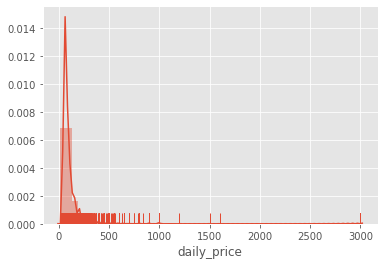

In [ ]:
sns.distplot(df['daily_price'], rug= True)

In [ ]:
df_preprocess_dailyprice = df

In [ ]:
from sklearn.preprocessing import StandardScaler
col_names = ['daily_price']
features = df[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df[col_names] = features

In [ ]:
df

,host_location,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,bed_type,daily_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,TV,WiFi,Air_Condition,Wheelchair_accessible,Kitchen,Breakfast,Elevator,Heating,Washer,Iron,Host_greets_you,Paid_parking_on_premises,Luggage_dropoff_allowed,Long_term_stays_allowed,Doorman,Pets_allowed,Smoking_allowed,Suitable_for_events,24_hour_check_in,label
0,1,1,57,0,3,1,1,1,45.47015,9.19134,2,3,1,1,1,-0.070571,1,45,1,0,2,29,59,89,364,84,9,9,10,10,10,9,0,1,1,1,1,1,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,2
1,1,1,57,0,1,1,0,1,45.47169,9.18412,4,3,1,1,1,0.154150,31,30,1,0,2,0,0,9,284,3,10,10,10,10,10,9,0,0,0,0,1,1,1,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1
2,1,1,57,0,3,1,1,1,45.47117,9.19135,2,3,1,1,1,-0.027076,1,45,1,0,2,29,59,89,364,70,9,10,10,10,10,9,0,1,1,1,1,1,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1
3,1,1,57,0,1,1,0,1,45.47204,9.19640,3,3,1,2,1,0.117905,48,57,2,40,2,10,40,70,160,57,10,10,10,10,10,10,0,1,0,0,1,1,1,0,1,0,1,1,0,1,0,1,1,0,0,1,0,0,0,1
4,1,1,57,1,2,1,0,1,45.45934,9.20609,2,3,0,1,3,-0.244548,13,45,1,0,30,27,57,87,362,44,9,9,10,10,9,9,0,1,1,1,1,1,1,0,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9317,1,1,57,0,1,1,1,9,45.48586,9.19706,2,3,1,1,1,-0.172057,1,1,1,0,1,1,1,1,1,1,10,10,10,10,10,10,0,1,0,0,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1
9318,1,1,57,0,1,1,0,9,45.48170,9.18968,6,5,2,2,1,5.772166,1,69,2,30,1,9,9,18,204,2,10,10,10,10,10,10,1,0,0,0,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,1
9319,1,0,57,0,1,1,0,9,45.49807,9.18476,2,3,1,1,1,-0.244548,1,20,1,20,1,30,60,90,365,3,9,10,10,10,9,10,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1
9320,1,1,40,0,3,1,0,9,45.50107,9.18210,4,3,1,2,1,-0.280793,1,1,1,0,1,29,59,89,364,1,10,10,10,10,10,10,0,1,0,0,1,1,1,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1


In [ ]:
from sklearn.preprocessing import Normalizer
col_names = ['daily_price']
features = df[col_names]
normalizer = Normalizer(norm='max')
features = normalizer.fit_transform(features.values)
df[col_names] = features
df

,host_location,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,bed_type,daily_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,TV,WiFi,Air_Condition,Wheelchair_accessible,Kitchen,Breakfast,Elevator,Heating,Washer,Iron,Host_greets_you,Paid_parking_on_premises,Luggage_dropoff_allowed,Long_term_stays_allowed,Doorman,Pets_allowed,Smoking_allowed,Suitable_for_events,24_hour_check_in
0,1,1,57,0,3,1,1,1,45.47015,9.19134,2,3,1,1,1,1.0,1,45,1,0,2,29,59,89,364,84,9,9,10,10,10,0,1,1,1,1,1,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0
1,1,1,57,0,1,1,0,1,45.47169,9.18412,4,3,1,1,1,1.0,31,30,1,0,2,0,0,9,284,3,10,10,10,10,10,0,0,0,0,1,1,1,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0
2,1,1,57,0,3,1,1,1,45.47117,9.19135,2,3,1,1,1,1.0,1,45,1,0,2,29,59,89,364,70,9,10,10,10,10,0,1,1,1,1,1,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0
3,1,1,57,0,1,1,0,1,45.47204,9.19640,3,3,1,2,1,1.0,48,57,2,40,2,10,40,70,160,57,10,10,10,10,10,0,1,0,0,1,1,1,0,1,0,1,1,0,1,0,1,1,0,0,1,0,0,0
4,1,1,57,1,2,1,0,1,45.45934,9.20609,2,3,0,1,3,1.0,13,45,1,0,30,27,57,87,362,44,9,9,10,10,9,0,1,1,1,1,1,1,0,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9317,1,1,57,0,1,1,1,9,45.48586,9.19706,2,3,1,1,1,1.0,1,1,1,0,1,1,1,1,1,1,10,10,10,10,10,0,1,0,0,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0
9318,1,1,57,0,1,1,0,9,45.48170,9.18968,6,5,2,2,1,1.0,1,69,2,30,1,9,9,18,204,2,10,10,10,10,10,1,0,0,0,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0
9319,1,0,57,0,1,1,0,9,45.49807,9.18476,2,3,1,1,1,1.0,1,20,1,20,1,30,60,90,365,3,9,10,10,10,9,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0
9320,1,1,40,0,3,1,0,9,45.50107,9.18210,4,3,1,2,1,1.0,1,1,1,0,1,29,59,89,364,1,10,10,10,10,10,0,1,0,0,1,1,1,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0


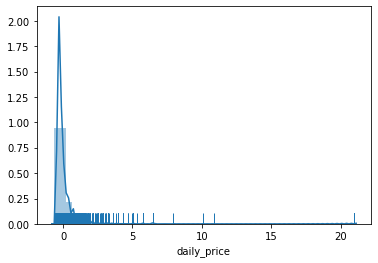

In [ ]:
sns.distplot(df['daily_price'], rug= True)
# sns.distplot(df['cleaning_fee'], rug= True)


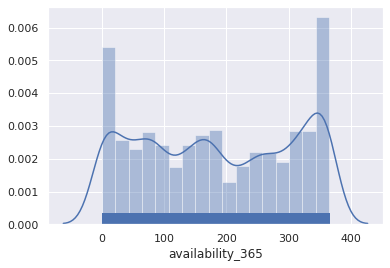

In [ ]:
sns.distplot(df['availability_365'], rug= True)
# sns.countplot(x ='availability_365', data =df)

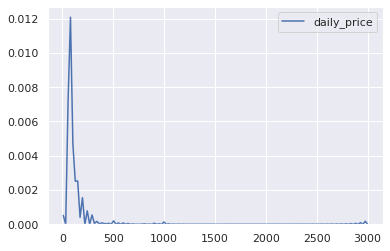

In [ ]:
sns.kdeplot(df['daily_price'], bw=0.3) #bw=標準差

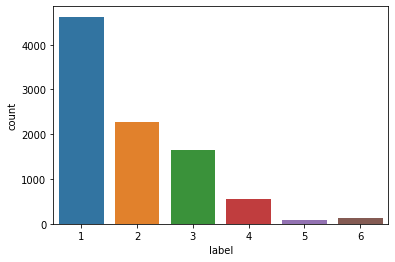

In [ ]:
sns.countplot(x ='label', data =df)

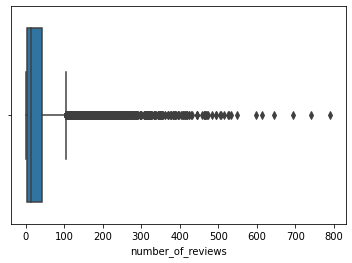

In [ ]:
sns.boxplot(x='number_of_reviews' , data =df)

In [ ]:
print("Median:", df['number_of_reviews'].median())
print(df['number_of_reviews'].describe())

Median: 14.0
count    9322.000000
mean       39.640742
std        65.597271
min         1.000000
25%         4.000000
50%        14.000000
75%        44.000000
max       791.000000
Name: number_of_reviews, dtype: float64


In [ ]:
df = df.drop(['number_of_reviews'], axis=1)
df = df.drop (['review_scores_accuracy'], axis=1)

In [ ]:
indexNames = df[df['number_of_reviews']<=4].index
print(indexNames)

df.drop(indexNames, inplace= True)

Int64Index([   1,   11,   12,   24,   25,   49,   55,   64,   66,   73,
            ...
            9311, 9312, 9313, 9315, 9316, 9317, 9318, 9319, 9320, 9321],
           dtype='int64', length=2387)


In [ ]:
print("Median:", df['review_scores_accuracy'].median())
print(df['review_scores_accuracy'].describe())

Median: 10.0
count    7347.000000
mean        9.645978
std         0.597685
min         5.000000
25%         9.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: review_scores_accuracy, dtype: float64


In [ ]:
indexNames = df[df['review_scores_accuracy']<=9].index
print(indexNames)

df.drop(indexNames, inplace= True)

Int64Index([   0,    2,    4,    9,   14,   16,   17,   20,   21,   22,
            ...
            9184, 9193, 9195, 9197, 9203, 9208, 9237, 9265, 9278, 9282],
           dtype='int64', length=2095)


# *資料處理了，現在可以開始做資料降緯*

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4840 entries, 3 to 9314
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   host_location                     4840 non-null   int64  
 1   host_response_time                4840 non-null   int64  
 2   host_response_rate                4840 non-null   int64  
 3   host_is_superhost                 4840 non-null   int64  
 4   host_total_listings_count         4840 non-null   int64  
 5   host_has_profile_pic              4840 non-null   int64  
 6   host_identity_verified            4840 non-null   int64  
 7   neighbourhood_cleansed            4840 non-null   int64  
 8   latitude                          4840 non-null   float64
 9   longitude                         4840 non-null   float64
 10  accommodates                      4840 non-null   int64  
 11  bathrooms                         4840 non-null   int64  
 12  bedroo

In [ ]:
df_backup = df

In [ ]:
df = df_backup

In [ ]:
IG_results = {}
IGR_results = {}

for i in range(0,54):
  colname = df.columns[i]
  IG_scores = info_gain.info_gain(df.iloc[ : , i], df['label'])
  IGR_scores = info_gain.info_gain_ratio(df.iloc[ : , i], df['label'])
  IG_results[colname] = IG_scores
  IGR_results[colname] = IGR_scores

IG_results_sorted = sorted(IG_results.items(),key= lambda item:item[1], reverse= True)
IGR_results_sorted = sorted(IGR_results.items(),key= lambda item:item[1], reverse= True)

for b, a in enumerate(IG_results_sorted):
  index = b+1
  name = a[0]
  score = a[1]

  print("%d) %s = %f\n" %(index, name, score))

  if(score<0.01):
    df = df.drop([name], axis=1)

print(df.info())

1) longitude = 0.661287

2) latitude = 0.616465

3) review_scores_value = 0.146979

4) review_scores_cleanliness = 0.107195

5) availability_365 = 0.091749

6) number_of_reviews = 0.088753

7) host_is_superhost = 0.080839

8) daily_price = 0.056017

9) review_scores_checkin = 0.046835

10) review_scores_communication = 0.046543

11) host_total_listings_count = 0.039643

12) availability_90 = 0.030444

13) cleaning_fee = 0.027852

14) host_response_rate = 0.026245

15) availability_60 = 0.021453

16) review_scores_location = 0.019611

17) security_deposit = 0.019458

18) extra_people = 0.013714

19) minimum_nights = 0.013321

20) availability_30 = 0.010298

21) Luggage_dropoff_allowed = 0.006678

22) Breakfast = 0.006034

23) accommodates = 0.005117

24) Air_Condition = 0.004535

25) instant_bookable = 0.004451

26) guests_included = 0.004130

27) Paid_parking_on_premises = 0.003569

28) neighbourhood_cleansed = 0.003325

29) bathrooms = 0.003098

30) bedrooms = 0.002972

31) Pets_allow

# **PCA降緯**

In [ ]:
df_backup =df

In [ ]:
df = df_backup

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4840 entries, 3 to 9314
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_rate           4840 non-null   int64  
 1   host_is_superhost            4840 non-null   int64  
 2   host_total_listings_count    4840 non-null   int64  
 3   latitude                     4840 non-null   float64
 4   longitude                    4840 non-null   float64
 5   daily_price                  4840 non-null   float64
 6   security_deposit             4840 non-null   int64  
 7   cleaning_fee                 4840 non-null   int64  
 8   extra_people                 4840 non-null   int64  
 9   minimum_nights               4840 non-null   int64  
 10  availability_30              4840 non-null   int64  
 11  availability_60              4840 non-null   int64  
 12  availability_90              4840 non-null   int64  
 13  availability_365  

In [ ]:
aaa = df[['daily_price', 'security_deposit', 'cleaning_fee','review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'number_of_reviews']]
bbb  = df.drop(['daily_price', 'security_deposit', 'cleaning_fee','review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value'], axis=1)
aaa.info()
bbb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4840 entries, 3 to 9314
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   daily_price                  4840 non-null   float64
 1   security_deposit             4840 non-null   int64  
 2   cleaning_fee                 4840 non-null   int64  
 3   review_scores_cleanliness    4840 non-null   int64  
 4   review_scores_checkin        4840 non-null   int64  
 5   review_scores_communication  4840 non-null   int64  
 6   review_scores_location       4840 non-null   int64  
 7   review_scores_value          4840 non-null   int64  
 8   number_of_reviews            4840 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 378.1 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4840 entries, 3 to 9314
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     ---------

[1 2 3 4 5 6 7 8 9]
[0.7641684  0.9269588  0.99981084 0.99987034 0.99992215 0.99995464
 0.99997672 0.99999364 1.        ]


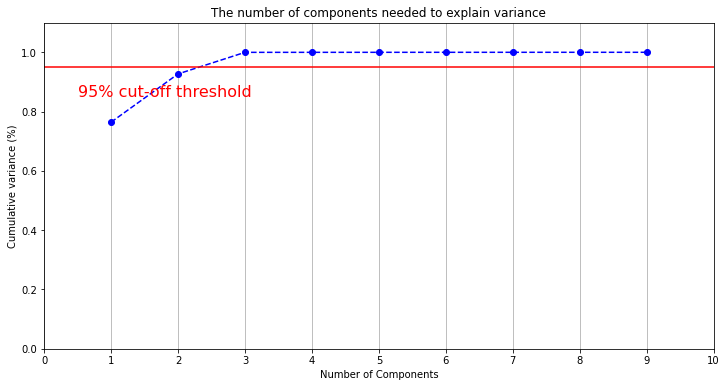

In [ ]:
pca = PCA().fit(aaa)

% matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 10, step=1)
y = np.cumsum(pca.explained_variance_ratio_)
print(xi)
print(y)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

選 Number of Components = 4


In [ ]:
pca = PCA(n_components=4)
pca.fit(aaa)
x_pca_a = pca.transform(aaa)
print("original shape: ", aaa.shape)
print("transformed shape: ", x_pca_a.shape)

original shape:  (4840, 9)
transformed shape:  (4840, 4)


In [ ]:
pca = PCA(n_components='mle')
pca.fit(aaa)
x_pca_a_mle = pca.transform(aaa)
print("original shape: ", aaa.shape)
print("transformed shape: ", x_pca_a_mle.shape)

original shape:  (4840, 9)
transformed shape:  (4840, 8)


In [ ]:
x_pca_a = pd.DataFrame(x_pca_a)
# x_pca_a_mle = pd.DataFrame(x_pca_a_mle)

In [ ]:
#original df
df_org = df
df_org

,host_response_rate,host_is_superhost,host_total_listings_count,latitude,longitude,daily_price,security_deposit,cleaning_fee,extra_people,minimum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,24_hour_check_in,label
3,57,0,1,45.47204,9.19640,0.117905,48,57,40,2,10,40,70,160,57,10,10,10,10,10,0,1
5,29,0,8,45.46022,9.18279,0.697829,48,57,20,15,0,3,33,308,79,10,10,10,10,10,1,1
6,57,1,6,45.47240,9.18603,4.322355,1,1,55,1,0,0,0,202,72,10,10,10,10,9,1,1
7,57,0,2,45.46171,9.18815,1.060282,73,80,25,1,30,60,90,365,126,10,10,10,10,10,0,1
8,57,0,8,45.46241,9.18664,-0.027076,13,1,20,1,4,10,15,260,377,10,10,10,10,9,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9292,57,1,22,45.48641,9.19632,-0.172057,1,57,25,2,21,41,64,154,9,10,10,10,10,10,0,1
9296,57,0,2,45.48865,9.18799,-0.251797,1,45,12,2,3,3,3,3,9,10,10,10,10,9,0,2
9302,57,1,5,45.48540,9.19647,-0.208303,1,45,0,1,6,26,54,224,12,9,9,10,10,10,0,1
9308,57,0,48,45.49534,9.18426,-0.324287,1,10,4,1,23,53,82,82,6,10,9,9,10,10,0,1


In [ ]:
df = pd.concat([x_pca_a,bbb], axis=1) 

In [ ]:
df.dropna(inplace=True)
df

,0,1,2,3,host_response_rate,host_is_superhost,host_total_listings_count,latitude,longitude,extra_people,minimum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,24_hour_check_in,label
3,69.517909,58.739524,24.732326,1.150991,57.0,0.0,1.0,45.47204,9.19640,40.0,2.0,10.0,40.0,70.0,160.0,57.0,0.0,1
5,-22.181753,-32.494992,-36.233303,1.633102,29.0,0.0,8.0,45.46022,9.18279,20.0,15.0,0.0,3.0,33.0,308.0,79.0,1.0,1
6,-5.190757,-32.173576,-35.781615,1.273472,57.0,1.0,6.0,45.47240,9.18603,55.0,1.0,0.0,0.0,0.0,202.0,72.0,1.0,1
7,0.514196,19.028767,14.210790,-0.261882,57.0,0.0,2.0,45.46171,9.18815,25.0,1.0,30.0,60.0,90.0,365.0,126.0,0.0,1
8,48.075412,-17.147706,19.872158,0.404273,57.0,0.0,8.0,45.46241,9.18664,20.0,1.0,4.0,10.0,15.0,260.0,377.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4821,-44.169105,-32.917180,-36.825570,-0.481507,57.0,1.0,2.0,45.43711,9.21803,0.0,2.0,26.0,54.0,84.0,359.0,15.0,0.0,1
4824,-43.169098,-32.896393,-36.795612,0.162663,57.0,1.0,1.0,45.44868,9.20997,0.0,1.0,14.0,26.0,56.0,146.0,16.0,0.0,1
4826,-46.228877,-32.455113,-34.943433,-0.317813,51.0,1.0,5.0,45.46192,9.21289,15.0,1.0,7.0,21.0,33.0,308.0,11.0,0.0,1
4829,-19.761232,-27.697254,-17.772866,-0.114188,57.0,1.0,1.0,45.46448,9.21610,0.0,1.0,9.0,13.0,40.0,130.0,13.0,0.0,1


# *訓練模型*

In [ ]:
df_backup = df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7029 entries, 0 to 9314
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_rate           7029 non-null   int64  
 1   host_is_superhost            7029 non-null   int64  
 2   host_total_listings_count    7029 non-null   int64  
 3   latitude                     7029 non-null   float64
 4   longitude                    7029 non-null   float64
 5   daily_price                  7029 non-null   float64
 6   security_deposit             7029 non-null   int64  
 7   cleaning_fee                 7029 non-null   int64  
 8   extra_people                 7029 non-null   int64  
 9   minimum_nights               7029 non-null   int64  
 10  availability_30              7029 non-null   int64  
 11  availability_60              7029 non-null   int64  
 12  availability_90              7029 non-null   int64  
 13  availability_365  

In [ ]:
x = df.drop(['label'], axis=1)
y = df['label']

In [ ]:
accuracy_results={}
dt = tree.DecisionTreeClassifier()

for i in np.arange(0.1,0.9,0.01):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=i, random_state=1)
  dt.fit(x_train, y_train)
  accuracy_score =  dt.score(x_test, y_test)
  accuracy_results[i] = accuracy_score

accuracy_results_sorted = sorted(accuracy_results.items(),key= lambda item:item[1], reverse= True)
for b, a in enumerate(accuracy_results_sorted):
  index = b+1
  name = a[0]
  score = a[1]
  print("%d) %s = %f\n" %(index, name, score))

KeyboardInterrupt: ignored

The confusion metrix of tranning set
 [[490 149  37   1]
 [139 197  85   7]
 [ 32  99 132  15]
 [  0   4  15   4]]
The confusion metrix of testing set
 [[490 149  37   1]
 [139 197  85   7]
 [ 32  99 132  15]
 [  0   4  15   4]]
              precision    recall  f1-score   support

           1       0.74      0.72      0.73       677
           2       0.44      0.46      0.45       428
           3       0.49      0.47      0.48       278
           4       0.15      0.17      0.16        23

    accuracy                           0.59      1406
   macro avg       0.45      0.46      0.46      1406
weighted avg       0.59      0.59      0.59      1406



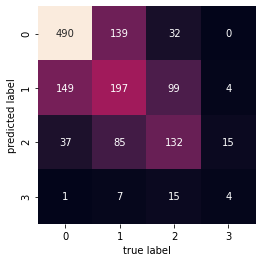

In [ ]:
dt = tree.DecisionTreeClassifier()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
model2 = dt.fit(x_train, y_train)
cnf=confusion_matrix(y_test, dt.predict(x_test))
print('The confusion metrix of tranning set\n', cnf)
cnf=confusion_matrix(y_test, dt.predict(x_test))
print('The confusion metrix of testing set\n', cnf)

mat = confusion_matrix(y_test, dt.predict(x_test))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

print(classification_report(y_test, dt.predict(x_test)))

The confusion metrix of tranning set
 [[677   0   0   0]
 [  0 428   0   0]
 [  0   0 278   0]
 [  0   0   0  23]]
The confusion metrix of testing set
 [[1890  672  142    6    0]
 [ 612  694  402   18    0]
 [ 120  389  509   57    0]
 [   8   19   63   20    0]
 [   0    0    1    1    0]]
              precision    recall  f1-score   support

           1       0.72      0.70      0.71      2710
           2       0.39      0.40      0.40      1726
           3       0.46      0.47      0.46      1075
           4       0.20      0.18      0.19       110
           5       0.00      0.00      0.00         2

    accuracy                           0.55      5623
   macro avg       0.35      0.35      0.35      5623
weighted avg       0.56      0.55      0.56      5623



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


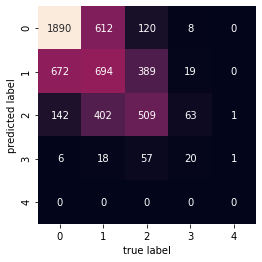

In [ ]:
dt = tree.DecisionTreeClassifier()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
model2 = dt.fit(x_test, y_test)
cnf=confusion_matrix(y_test, dt.predict(x_test))
print('The confusion metrix of tranning set\n', cnf)
cnf=confusion_matrix(y_train, dt.predict(x_train))
print('The confusion metrix of testing set\n', cnf)

mat = confusion_matrix(y_train, dt.predict(x_train))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

print(classification_report(y_train, dt.predict(x_train)))

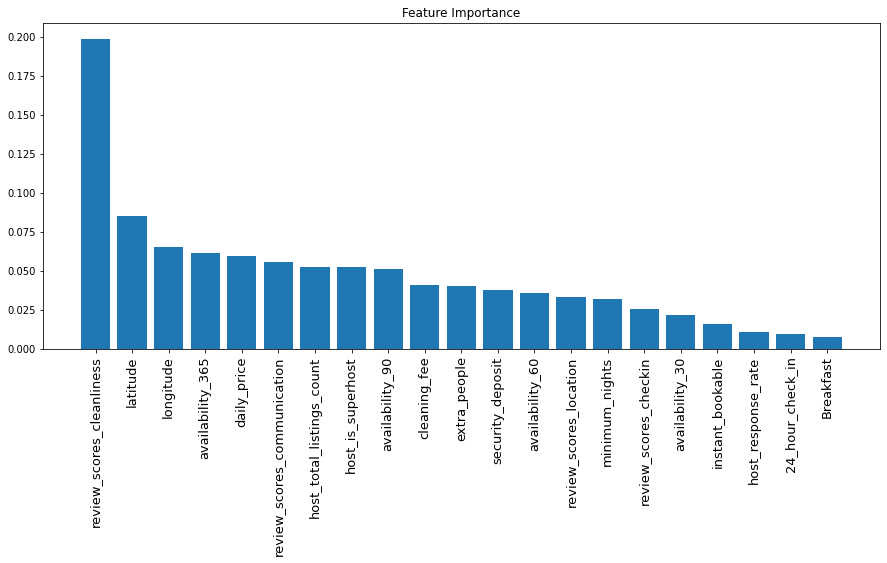

In [ ]:
# Calculate feature importances
importances = model2.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
	
names = [df.columns.values[i] for i in indices]
plt.rcParams["figure.figsize"] = (15,6)
# Barplot: Add bars
plt.bar(range(x.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(x.shape[1]), names, rotation=90, fontsize = 13)
# Create plot title
plt.title("Feature Importance")
# Show plot
plt.show()

In [ ]:
accuracy_results={}

for i in np.arange(0.1,0.9,0.01):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=i, random_state=1)
  rfc = RandomForestClassifier(n_estimators=50)
  rfc.fit(x_train,y_train)
  accuracy_score =  rfc.score(x_test,y_test)
  accuracy_results[i] = accuracy_score

accuracy_results_sorted = sorted(accuracy_results.items(),key= lambda item:item[1], reverse= True)
for b, a in enumerate(accuracy_results_sorted):
  index = b+1
  name = a[0]
  score = a[1]
  print("%d) %s = %f\n" %(index, name, score))


# accuracy_results={}

# # for i in np.arange(0.1,0.9,0.01):
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
# rfc = RandomForestClassifier(n_estimators=200)
# rfc.fit(x_train,y_train)
# accuracy_score =  rfc.score(x_test,y_test)

# accuracy_rfc = pd.DataFrame(accuracy_score)
# accuracy_rfc

1) 0.13 = 0.768254

2) 0.14999999999999997 = 0.764463

3) 0.11 = 0.761726

4) 0.20999999999999996 = 0.758112

5) 0.23999999999999994 = 0.757315

6) 0.18999999999999995 = 0.755435

7) 0.5499999999999998 = 0.754320

8) 0.13999999999999999 = 0.753687

9) 0.5699999999999997 = 0.753534

10) 0.2799999999999999 = 0.752212

11) 0.45999999999999985 = 0.752133

12) 0.16999999999999998 = 0.752126

13) 0.4199999999999998 = 0.751599

14) 0.5599999999999997 = 0.751383

15) 0.47999999999999976 = 0.751291

16) 0.24999999999999992 = 0.751240

17) 0.21999999999999995 = 0.751174

18) 0.17999999999999997 = 0.751147

19) 0.3799999999999999 = 0.751087

20) 0.15999999999999998 = 0.750968

21) 0.22999999999999995 = 0.750449

22) 0.12 = 0.750430

23) 0.5299999999999998 = 0.749805

24) 0.5799999999999997 = 0.749644

25) 0.48999999999999977 = 0.749578

26) 0.5399999999999998 = 0.749426

27) 0.5099999999999998 = 0.748886

28) 0.30999999999999994 = 0.748834

29) 0.6099999999999998 = 0.748730

30) 0.469999999999999

[[2282  370   58    0    0]
 [ 667  722  337    0    0]
 [ 101  349  623    2    0]
 [   6   20   82    2    0]
 [   0    0    2    0    0]]
              precision    recall  f1-score   support

           1       0.75      0.84      0.79      2710
           2       0.49      0.42      0.45      1726
           3       0.57      0.58      0.57      1075
           4       0.50      0.02      0.04       110
           5       0.00      0.00      0.00         2

    accuracy                           0.65      5623
   macro avg       0.46      0.37      0.37      5623
weighted avg       0.63      0.65      0.63      5623



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


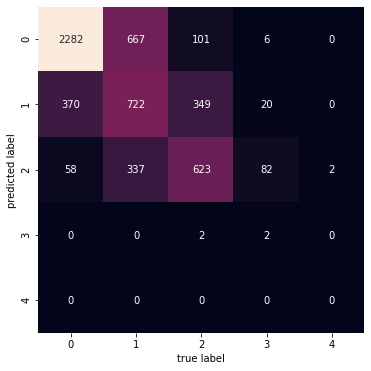

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
rfc = RandomForestClassifier(n_estimators=50)
model = rfc.fit(x_test,y_test)
rfc_pred = rfc.predict(x_train)

print(confusion_matrix(y_train, rfc_pred))
print(classification_report(y_train, rfc_pred))

mat = confusion_matrix(y_train, rfc_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

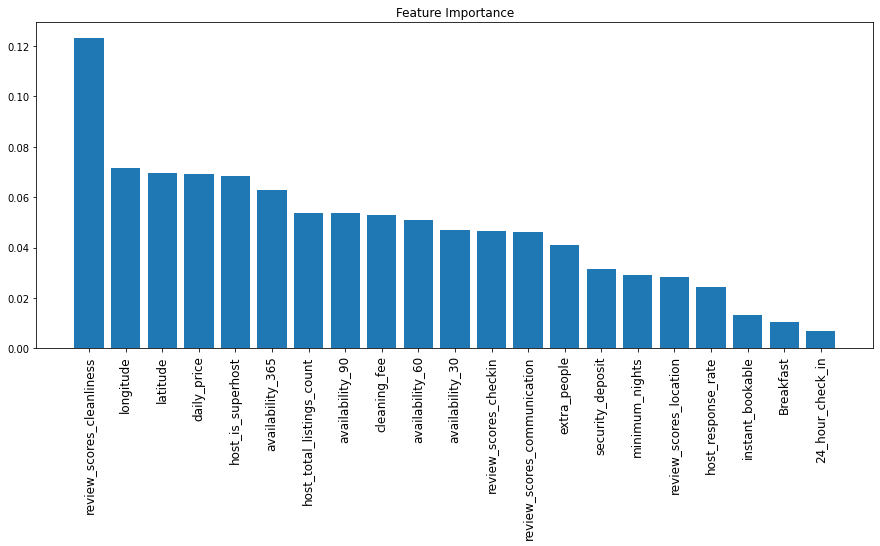

In [ ]:
# Calculate feature importances
importances = model.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
	
names = [df.columns.values[i] for i in indices]

# Barplot: Add bars
plt.bar(range(x.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(x.shape[1]), names, rotation=90, fontsize = 12)
# Create plot title
plt.title("Feature Importance")
# Show plot
plt.show()

In [ ]:
accuracy_results={}
g_nb = GaussianNB(priors = None)

for i in np.arange(0.1,0.9,0.01):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=i, random_state=1)
  g_nb_fit = g_nb.fit(x_train, y_train)
  accuracy_score = g_nb_fit.score(x_test,y_test)
  accuracy_results[i] = accuracy_score

accuracy_results_sorted = sorted(accuracy_results.items(),key= lambda item:item[1], reverse= True)
for b, a in enumerate(accuracy_results_sorted):
  index = b+1
  name = a[0]
  score = a[1]
  print("%d) %s = %f\n" %(index, name, score))

NameError: ignored

In [ ]:
from sklearn.naive_bayes import GaussianNB
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

g_nb = GaussianNB(priors = None)
g_nb_fit = g_nb.fit(x_test, y_test)

g_nb_pred = g_nb.predict(x_train)
print(confusion_matrix(y_train, g_nb_pred))
print(classification_report(y_train, g_nb_pred))

[[2272  135   82  221    0]
 [ 668  262   84  712    0]
 [  82  132   70  791    0]
 [   2   11    8   89    0]
 [   0    0    0    2    0]]
              precision    recall  f1-score   support

           1       0.75      0.84      0.79      2710
           2       0.49      0.15      0.23      1726
           3       0.29      0.07      0.11      1075
           4       0.05      0.81      0.09       110
           5       0.00      0.00      0.00         2

    accuracy                           0.48      5623
   macro avg       0.31      0.37      0.24      5623
weighted avg       0.57      0.48      0.48      5623



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.linear_model import LogisticRegression

accuracy_results={}
logisticRegr = LogisticRegression()
for i in np.arange(0.1,0.9,0.01):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=i, random_state=1)
  logisticRegr.fit(x_train, y_train)
  accuracy_score =  logisticRegr.score(x_test, y_test)
  accuracy_results[i] = accuracy_score

accuracy_results_sorted = sorted(accuracy_results.items(),key= lambda item:item[1], reverse= True)

for b, a in enumerate(accuracy_results_sorted):
  index = b+1
  name = a[0]
  score = a[1]
  print("%d) %s = %f\n" %(index, name, score))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


KeyboardInterrupt: ignored

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
logisticRegr.fit(x_train, y_train)
predictions = logisticRegr.predict(x_test)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[302  19   0]
 [121  32   0]
 [ 28   7   0]]
              precision    recall  f1-score   support

           1       0.67      0.94      0.78       321
           2       0.55      0.21      0.30       153
           3       0.00      0.00      0.00        35

    accuracy                           0.66       509
   macro avg       0.41      0.38      0.36       509
weighted avg       0.59      0.66      0.58       509



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
accuracy_results={}
knn = KNeighborsClassifier(n_neighbors=29)
for i in np.arange(0.1,0.9,0.01):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=i, random_state=1)
  knn.fit(x_train,y_train)
  accuracy_score = knn.score(x_test,y_test)
  accuracy_results[i] = accuracy_score

accuracy_results_sorted = sorted(accuracy_results.items(),key= lambda item:item[1], reverse= True)

for b, a in enumerate(accuracy_results_sorted):
  index = b+1
  name = a[0]
  score = a[1]
  print("%d) %s = %f\n" %(index, name, score))


NameError: ignored

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []

for i in range(1,30):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred_i = knn.predict(x_test)
  error_rate.append(np.mean(pred_i !=y_test))

plt.figure(figsize=(20,6))
plt.plot(range(1,30),error_rate,color="blue",linestyle="dashed",marker="o",markerfacecolor="red",markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K")

plt.ylabel("Error Rate")

NameError: ignored

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
knn = KNeighborsClassifier(n_neighbors= 11)
knn.fit(x_test,y_test)
pred = knn.predict(x_train)

print(confusion_matrix(y_train,pred))
print(classification_report(y_train,pred))

[[2112  430  168    0    0]
 [1164  371  191    0    0]
 [ 594  274  207    0    0]
 [  49   28   33    0    0]
 [   1    0    1    0    0]]
              precision    recall  f1-score   support

           1       0.54      0.78      0.64      2710
           2       0.34      0.21      0.26      1726
           3       0.34      0.19      0.25      1075
           4       0.00      0.00      0.00       110
           5       0.00      0.00      0.00         2

    accuracy                           0.48      5623
   macro avg       0.24      0.24      0.23      5623
weighted avg       0.43      0.48      0.43      5623



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


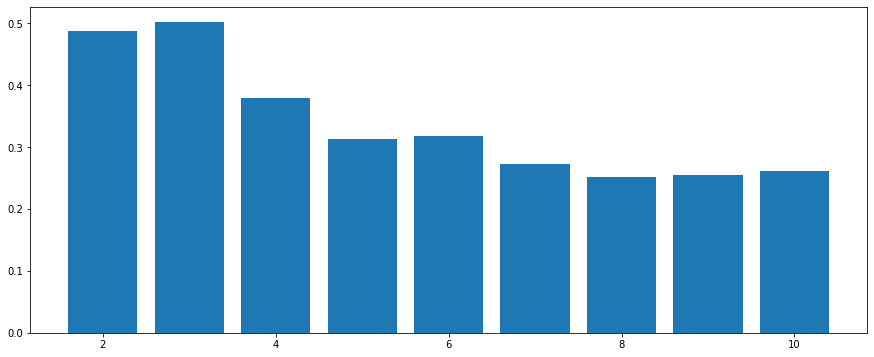

In [ ]:
from sklearn import cluster, metrics
kmeans_x = x

result_knn = []
ks = range(2,11)

for k in ks:
  kmeans_fit = cluster.KMeans(n_clusters=k).fit(kmeans_x)
  cluster_labels = kmeans_fit.labels_
  aa = metrics.silhouette_score(kmeans_x, cluster_labels)
  result_knn.append(aa)

plt.bar(ks,result_knn)
plt.show()

# *沒有用到的方法*

In [ ]:
# 等頻率離散化
data_of_daily_price = df['daily_price']
data_sorted = sorted(data_of_daily_price, reverse= True)
k = 10
in_labels = [i+1 for i in range(k)]
df['dengpin'] = pd.qcut(data_sorted,k, labels=in_labels)
###
d1= pd.qcut(data_sorted,k, labels=in_labels)
print(d1.value_counts())

def cluster_plot(d,k):
    import matplotlib.pyplot as plt
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    
    plt.figure(figsize = (12,4))
    for j in range(0,k):
        plt.plot(data[d==j], [j for i in d[d==j]],'o')
        
    plt.ylim(-0.5, k-0.5)
    return plt

# cluster_plot(d1, k).show()
df

1      992
2     1154
3      873
4      808
5      891
6      927
7      885
8      999
9      871
10     922
dtype: int64


,host_location,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,accommodates,bathrooms,bedrooms,beds,bed_type,daily_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,TV,WiFi,Air_Condition,Wheelchair_accessible,Kitchen,Breakfast,Elevator,Heating,Washer,Iron,Host_greets_you,Paid_parking_on_premises,Luggage_dropoff_allowed,Long_term_stays_allowed,Doorman,Pets_allowed,Smoking_allowed,Suitable_for_events,24_hour_check_in,dengpin
0,1,1,57,0,3,1,1,1,2,3,1,1,1,94,1,45,1,0,2,29,59,89,364,84,94,9,9,10,10,10,9,0,1,1,1,1,1,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,10
1,1,1,57,0,1,1,0,1,4,3,1,1,1,125,31,30,1,0,2,0,0,9,284,3,100,10,10,10,10,10,9,0,0,0,0,1,1,1,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,10
2,1,1,57,0,3,1,1,1,2,3,1,1,1,100,1,45,1,0,2,29,59,89,364,70,97,9,10,10,10,10,9,0,1,1,1,1,1,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,10
3,1,1,57,0,1,1,0,1,3,3,1,2,1,120,48,57,2,40,2,10,40,70,160,57,97,10,10,10,10,10,10,0,1,0,0,1,1,1,0,1,0,1,1,0,1,0,1,1,0,0,1,0,0,0,10
4,1,1,57,1,2,1,0,1,2,3,0,1,3,70,13,45,1,0,30,27,57,87,362,44,90,9,9,10,10,9,9,0,1,1,1,1,1,1,0,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9317,1,1,57,0,1,1,1,9,2,3,1,1,1,80,1,1,1,0,1,1,1,1,1,1,100,10,10,10,10,10,10,0,1,0,0,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1
9318,1,1,57,0,1,1,0,9,6,5,2,2,1,900,1,69,2,30,1,9,9,18,204,2,100,10,10,10,10,10,10,1,0,0,0,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,1
9319,1,0,57,0,1,1,0,9,2,3,1,1,1,70,1,20,1,20,1,30,60,90,365,3,100,9,10,10,10,9,10,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1
9320,1,1,40,0,3,1,0,9,4,3,1,2,1,65,1,1,1,0,1,29,59,89,364,1,100,10,10,10,10,10,10,0,1,0,0,1,1,1,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1


In [ ]:
# 等頻率離散化2
data_of_daily_price = df['daily_price']
data_sorted = sorted(data_of_daily_price, reverse= True)
k = 10 
w = [1.0 * i / k for i in range(k + 1)] 
in_labels = [i+1 for i in range(k)]
print(w)
w = data_of_daily_price.describe(percentiles=w)[4:4 + k + 1] 
w[0] = w[0] * (1 - 1e-10) 
d4 = pd.cut(data_of_daily_price, w, labels=in_labels)
print(d4.value_counts())
df.insert(2, "Age", [21, 23, 24, 21], True) 
# df['dengpin2'] = pd.cut(data_of_daily_price, w, labels=in_labels)

def cluster_plot(d,k):
    import matplotlib.pyplot as plt
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    
    plt.figure(figsize = (12,4))
    for j in range(0,k):
        plt.plot(data[d==j], [j for i in d[d==j]],'o')
        
    plt.ylim(-0.5, k-0.5)
    return plt

# cluster_plot(d4, k).show()
df

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
2     1154
8      999
1      992
6      927
10     922
5      891
7      885
3      873
9      871
4      808
Name: daily_price, dtype: int64


,host_location,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,accommodates,bathrooms,bedrooms,beds,bed_type,daily_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,TV,WiFi,Air_Condition,Wheelchair_accessible,Kitchen,Breakfast,Elevator,Heating,Washer,Iron,Host_greets_you,Paid_parking_on_premises,Luggage_dropoff_allowed,Long_term_stays_allowed,Doorman,Pets_allowed,Smoking_allowed,Suitable_for_events,24_hour_check_in,dengpin,dengpin2
0,1,1,57,0,3,1,1,1,2,3,1,1,1,94,1,45,1,0,2,29,59,89,364,84,94,9,9,10,10,10,9,0,1,1,1,1,1,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,10,7
1,1,1,57,0,1,1,0,1,4,3,1,1,1,125,31,30,1,0,2,0,0,9,284,3,100,10,10,10,10,10,9,0,0,0,0,1,1,1,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,10,9
2,1,1,57,0,3,1,1,1,2,3,1,1,1,100,1,45,1,0,2,29,59,89,364,70,97,9,10,10,10,10,9,0,1,1,1,1,1,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,10,8
3,1,1,57,0,1,1,0,1,3,3,1,2,1,120,48,57,2,40,2,10,40,70,160,57,97,10,10,10,10,10,10,0,1,0,0,1,1,1,0,1,0,1,1,0,1,0,1,1,0,0,1,0,0,0,10,8
4,1,1,57,1,2,1,0,1,2,3,0,1,3,70,13,45,1,0,30,27,57,87,362,44,90,9,9,10,10,9,9,0,1,1,1,1,1,1,0,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,10,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9317,1,1,57,0,1,1,1,9,2,3,1,1,1,80,1,1,1,0,1,1,1,1,1,1,100,10,10,10,10,10,10,0,1,0,0,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,6
9318,1,1,57,0,1,1,0,9,6,5,2,2,1,900,1,69,2,30,1,9,9,18,204,2,100,10,10,10,10,10,10,1,0,0,0,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,1,10
9319,1,0,57,0,1,1,0,9,2,3,1,1,1,70,1,20,1,20,1,30,60,90,365,3,100,9,10,10,10,9,10,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,5
9320,1,1,40,0,3,1,0,9,4,3,1,2,1,65,1,1,1,0,1,29,59,89,364,1,100,10,10,10,10,10,10,0,1,0,0,1,1,1,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,4


In [ ]:
# 等寬離散化
k = 10
data1 = df['daily_price']
data1_sorted = sorted(data1, reverse= True)
sl_cut = pd.cut(data1_sorted, k)
print(sl_cut.value_counts())

(7.01, 309.0]       3831
(309.0, 608.0]        26
(608.0, 907.0]         9
(907.0, 1206.0]        5
(1206.0, 1505.0]       1
(1505.0, 1804.0]       0
(1804.0, 2103.0]       0
(2103.0, 2402.0]       0
(2402.0, 2701.0]       0
(2701.0, 3000.0]       1
dtype: int64


In [ ]:
df = df.drop(['daily_price'], axis=1)

In [ ]:
k=10
in_labels_5 = [i+1 for i in range(k)]
print(in_labels_5)

df['categories'] = pd.cut(df['daily_price'], k, labels=in_labels_5)
df

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


,host_response_rate,host_is_superhost,host_total_listings_count,accommodates,daily_price,security_deposit,cleaning_fee,extra_people,minimum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,Air_Condition,Breakfast,Washer,Iron,Luggage_dropoff_allowed,label,categories
0,57,0,3,2,94,1,45,0,2,29,59,89,364,84,9,9,10,10,10,9,0,1,0,0,1,0,C,1
2,57,0,3,2,100,1,45,0,2,29,59,89,364,70,9,10,10,10,10,9,0,1,0,0,1,0,B,1
3,57,0,1,3,120,48,57,40,2,10,40,70,160,57,10,10,10,10,10,10,0,1,0,0,1,1,B,1
4,57,1,2,2,70,13,45,0,30,27,57,87,362,44,9,9,10,10,9,9,0,1,0,1,1,0,D,1
5,29,0,8,2,200,48,57,20,15,0,3,33,308,79,10,10,10,10,10,10,0,1,0,1,1,0,B,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9202,57,1,22,3,65,1,51,30,2,11,31,56,146,24,10,10,10,10,10,10,0,1,0,1,1,0,A,1
9246,57,0,3,4,75,1,45,0,1,17,32,48,135,21,10,10,10,10,10,9,1,1,1,1,1,0,B,1
9251,52,1,1,4,45,48,51,15,1,5,26,56,78,28,10,10,10,10,10,10,0,1,0,1,1,0,B,1
9264,57,1,1,4,70,1,3,20,2,14,40,70,70,26,10,10,10,10,9,10,1,1,1,1,1,0,B,1
